In [181]:
#1.Imports & Congfiguration


In [182]:
import os
import json
from datetime import datetime
import warnings 
warnings.filterwarnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.inspection import permutation_importance

In [183]:
#2.Load Data

In [184]:
df = pd.read_csv("D:/Unified Internship Project/DS Adv Pro/Dataset/Climate/climate_nasa.csv")
df

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [185]:
df.shape

(522, 5)

In [186]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [187]:
#3.Defining the Target for Modeling

In [188]:
if 'emission' in df.columns:
    TARGET = 'emission'
elif 'LikesCount' in df.columns:
    TARGET = 'LikesCount'
else:
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    TARGET = numeric_cols[0]
    print("Selected target for modeling:", TARGET)

Selected target for modeling: likesCount


In [189]:
#4.EDA

In [190]:
print("\n---Statistics---")
df.describe(include='all').T


---Statistics---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,522,522,2022-09-07T17:12:32.000Z,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likesCount,522.0,NaN,NaN,NaN,4.720307,12.053556,0.0,0.0,1.0,4.0,126.0
profileName,522,483,fbc7d1a96db0c682c8caaaf292d13527b1483b341da109...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commentsCount,244.0,NaN,NaN,NaN,8.696721,12.266176,1.0,2.0,5.0,10.0,93.0
text,504,503,The “greenhouse effect” is concerned with the ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
print("\n Missing values (top20):")
df.isna().sum().sort_values(ascending=False).head(20)



 Missing values (top20):


commentsCount    278
text              18
date               0
likesCount         0
profileName        0
dtype: int64

In [192]:
# Plot distribution of the target

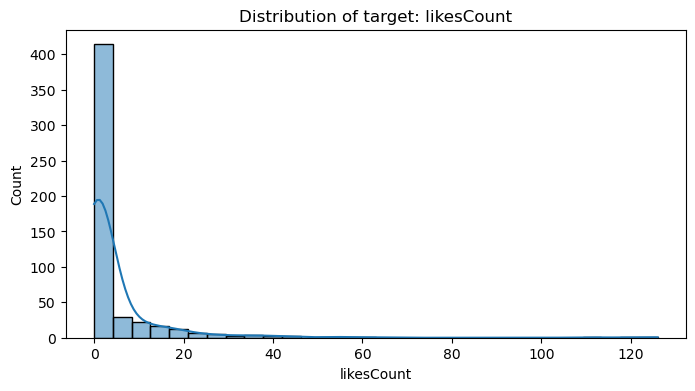

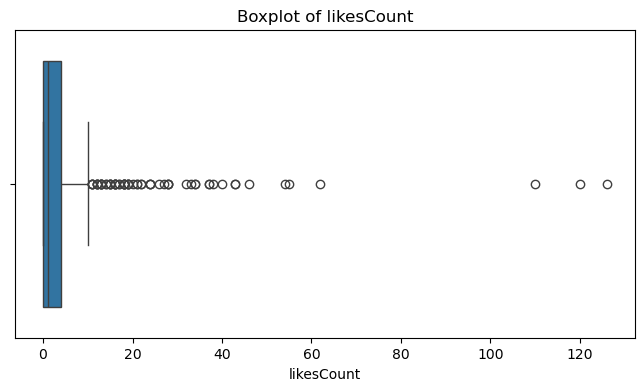

In [193]:
plt.figure(figsize=(8,4))
sns.histplot(df[TARGET].dropna(), bins=30, kde=True)
plt.title(f"Distribution of target: {TARGET}")
plt.show()

# Plot boxplot of the target
plt.figure(figsize=(8,4))
sns.boxplot(x=df[TARGET])
plt.title(f"Boxplot of {TARGET}")
plt.show()


In [194]:
#Correlation heatmap(numeric)

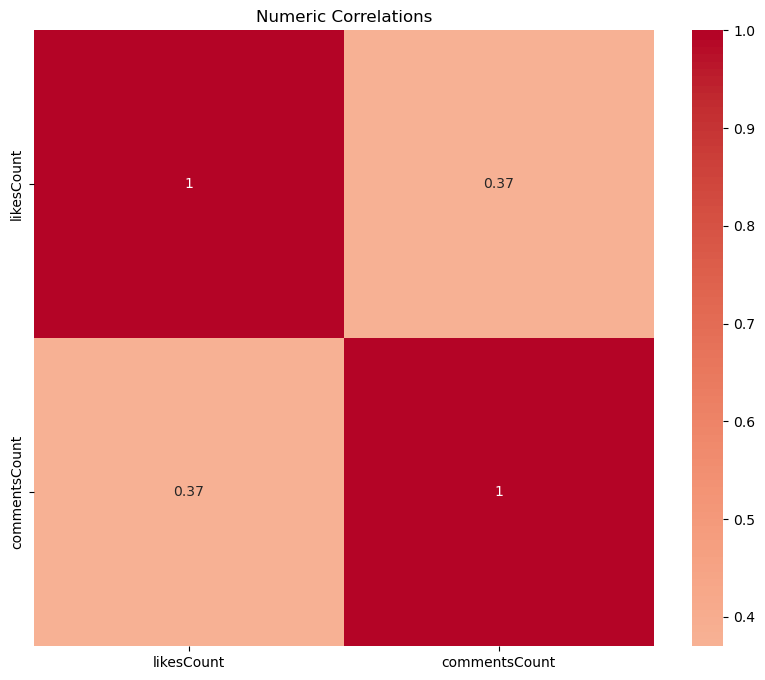

In [195]:
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols)>1:
    corr=df[num_cols].corr().abs().round(3)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr,annot=True,cmap='coolwarm',center=0)
    plt.title("Numeric Correlations")
    plt.show()


In [196]:
# 5.Missing values & duplicates handling 

In [197]:
print("Total missing cells:", df.isnull().sum().sum())
print("Duplicate rows present:", df.duplicated().any())


if df.duplicated().any():
    print("Dropping duplicates:", df.duplicated().sum())
    df = df.drop_duplicates().reset_index(drop=True)
data = df.copy()

Total missing cells: 296
Duplicate rows present: False


In [198]:
# 6.Date & Geo Features

In [199]:
# Parse Date if exists
if 'date' in data.columns:
    data['date_parsed']=pd.to_datetime(data["date"],errors="coerce")
    data["year"]=data["date_parsed"].dt.year
    data["month"]=data["date_parsed"].dt.month
    data["week"]=data["date_parsed"].dt.isocalendar().week.astype("Int64")
    data["dayofweek"]=data["date_parsed"].dt.dayofweek
    print("Parsed date column into year/month/week/day features")
else:
    print("No 'date' column found in the dataset.")

Parsed date column into year/month/week/day features


In [200]:
print(data.columns)

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text',
       'date_parsed', 'year', 'month', 'week', 'dayofweek'],
      dtype='object')


In [201]:
#7.Text features & Sentiment 

In [202]:
try:
    from textblob import TextBlob
    textblob_available = True
except ImportError:
    textblob_available = False

if 'Text' in data.columns:  # Clean the text
    data['text_clean'] = data['Text'].astype(str).fillna("").str.strip()
    # Simple text metrics
    data['text_len'] = data['text_clean'].apply(len)
    data['word_count'] = data['text_clean'].apply(lambda s: len(s.split()))

    # Sentiment polarity (-1..1) if TextBlob is available
    if textblob_available:
        data['sentiment'] = data['text_clean'].apply(
            lambda t: TextBlob(t).sentiment.polarity if t else 0.0
        )
        print("Extracted sentiment, text_len and word_count features.")
    else:
        print("Text column present but TextBlob not installed — skipping sentiment.")
else:
    print("No Text column found.")


No Text column found.


In [203]:
# 8. Lag features per location (if time + location present) 

In [204]:
if {"date_parsed", "latlon_grid", TARGET}.issubset(data.columns):
    # sort and create 1-lag target per latlon_grid
    data = data.sort_values(["latlon_grid", "date_parsed"]).reset_index(drop=True)
    data[f"{TARGET}_lag1"] = data.groupby("latlon_grid")[TARGET].shift(1)
    data[f"{TARGET}_lag1"] = data[f"{TARGET}_lag1"].fillna(method="bfill").fillna(0)
    print(f"Created lag feature: {TARGET}_lag1")
else:
    print("Skipping lag features (requires date and lat/lon grid)")

Skipping lag features (requires date and lat/lon grid)


In [205]:
# 9. Prepare feature matrix 

In [206]:
candidate_features = []

# Numeric core from dataset
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Remove target and any heavy id columns
for col in [TARGET, 'ID', 'Date_parsed']:
    if col in numeric_cols:
        numeric_cols.remove(col)

# Add some common features
common_features = ["likesCount", "commentsCount", "text_len", "word_count", "sentiment", f"{TARGET}_lag1", "year", "month", "week", "dayofweek"]
for col in common_features:
    if col in data.columns and col not in candidate_features:
        candidate_features.append(col)

# Add some top numeric correlations (top 8 correlated with target)
if TARGET in data.columns:
    numeric_for_corr = [c for c in numeric_cols if c != TARGET]
    if numeric_for_corr:
        corrs = data[numeric_for_corr + [TARGET]].corr()[TARGET].abs().sort_values(ascending=False)
        top_corrs = corrs.index.tolist()[:8]
        for c in top_corrs:
            if c not in candidate_features and c in data.columns:
                candidate_features.append(c)

# Fallback to first 10 numeric columns if still empty
if not candidate_features:
    candidate_features = numeric_cols[:10]

print("Features chosen (sample):", candidate_features[:20])

Features chosen (sample): ['likesCount', 'commentsCount', 'year', 'month', 'week', 'dayofweek']


In [207]:
# 10. Imputation & scaling pipelines

In [208]:
# numerical pipeline

In [209]:
# Define numeric transformer pipeline
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("power", PowerTransformer(method="yeo-johnson"))
])

# Build feature matrix x and target vector y
model_df = data.copy()
# Ensure target is present by dropping rows where it's missing
model_df = model_df.dropna(subset=[TARGET]).reset_index(drop=True)

# Select candidate features
x = model_df[candidate_features].copy()
# Select target
y = model_df[TARGET].values

# Print summary to verify
print("Features matrix x shape:", x.shape)
print("Target vector y shape:", y.shape)
print("First few rows of x:")
print(x.head())

Features matrix x shape: (522, 6)
Target vector y shape: (522,)
First few rows of x:
   likesCount  commentsCount  year  month  week  dayofweek
0           2            NaN  2022      9    36          2
1           0            NaN  2022      9    36          3
2           1            3.0  2022      9    36          2
3           4            NaN  2022      9    36          3
4          16           26.0  2022      9    36          2


In [210]:
# 11. Train/Test split

In [211]:
# Set random seed for reproducibility
SEED = 42

# Define numeric transformer pipeline
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # Fill missing values with median
    ("scaler", StandardScaler()),                   # Standardize the data
    ("power", PowerTransformer(method="yeo-johnson")) # Handle skewness
])

# Prepare feature matrix and target
model_df = data.copy()
model_df = model_df.dropna(subset=[TARGET]).reset_index(drop=True) # Ensure target present

x = model_df[candidate_features].copy()
y = model_df[TARGET].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

# Print shapes to verify
print("Train/Test shapes:", X_train.shape, X_test.shape)

Train/Test shapes: (391, 6) (131, 6)


In [212]:
# 12. Baseline models

In [213]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [214]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model with early stopping rounds
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=10
)

# Fit the model
xgb_model.fit(
    X_train_num,
    y_train,
    eval_set=[(X_test_num, y_test)],
    verbose=False
)

# Make predictions
pred_xgb = xgb_model.predict(X_test_num)

# Evaluate the model
results = {
    'MAE': mean_absolute_error(y_test, pred_xgb),
    'MSE': mean_squared_error(y_test, pred_xgb),
    'RMSE': mean_squared_error(y_test, pred_xgb, squared=False),
    'R2': r2_score(y_test, pred_xgb)
}

print("XGBoost:", results)


XGBoost: {'MAE': 0.10429979199548038, 'MSE': 0.40156552664342965, 'RMSE': 0.6336919808893194, 'R2': 0.9977814180725102}


In [215]:
# 13.Cross-validation and a small gridsearch 

In [216]:
print("\nRunning 4-fold CV for RandomForest(intermediate grid)...")
cv=KFold(n_splits=4,shuffle=True,random_state=SEED)
rf_cv_scores=cross_val_score(rf,X_train_num,y_train,cv=cv,
scoring="neg_root_mean_squared_error",n_jobs=-1)
print("RF CV RMSE(neg):",rf_cv_scores.mean(),"std:",rf_cv_scores.std())

#small GridSearch for RandomForest_n_estimators/max_depth(keeps rumtime modest)
param_grid={"n_estimators":[80,120],"max_depth":[8,12]}
gs=GridSearchCV(RandomForestRegressor(random_state=SEED,n_jobs=-1),param_grid,cv=3,
scoring="neg_mean_squared_error",n_jobs=-1)
gs.fit(X_train_num,y_train)
print("GridSearch best params:",gs.best_params_)
best_rf=gs.best_estimator_
pred_best_rf=best_rf.predict(X_test_num)
results["RandomForest_Grid"]=eval_reg(y_test,pred_best_rf)
print("RandomForest(grid)metrica:",results["RandomForest_Grid"])


Running 4-fold CV for RandomForest(intermediate grid)...
RF CV RMSE(neg): -3.509088303242633 std: 3.2798905669368517
GridSearch best params: {'max_depth': 8, 'n_estimators': 120}
RandomForest(grid)metrica: {'MAE': 0.3914758269720103, 'MSE': 7.894727523324853, 'RMSE': 2.8097557764554653, 'R2': 0.9563829595829388}


In [217]:
# 14. Evaluation visuals

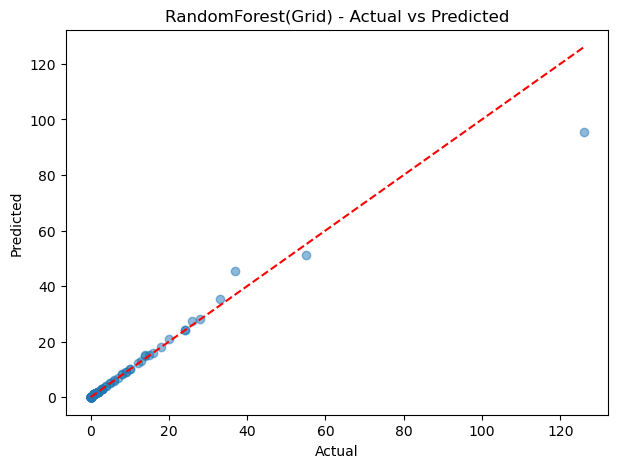

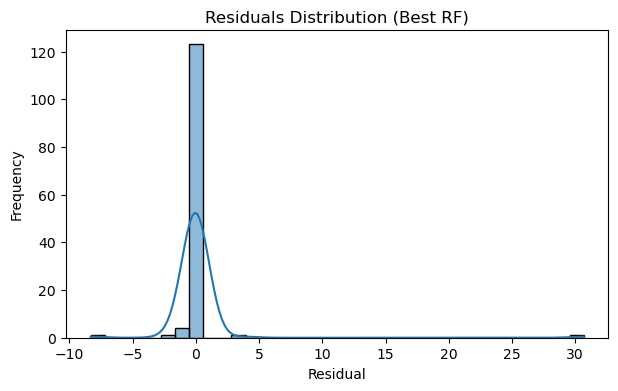

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot function to compare actual vs predicted values
def plot_true(y_true, y_pred, title="Predicted vs Actual"):
    plt.figure(figsize=(7, 5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "r--")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()

# Call the function once after it is defined
plot_true(y_test, pred_best_rf, title="RandomForest(Grid) - Actual vs Predicted")

# Residuals plot
resid = y_test - pred_best_rf
plt.figure(figsize=(7, 4))
sns.histplot(resid, bins=35, kde=True)
plt.title("Residuals Distribution (Best RF)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


In [219]:
# 15. Feature importance & lightweight explainability 
#(permutation importance)


Top features by permutation importance:


,feature,importance_mean,importance_sts
0,likesCount,1.688347,0.125674
1,commentsCount,0.002489,0.000340
2,week,0.000815,0.000791
3,dayofweek,-0.000120,0.002161
4,month,-0.000441,0.001396
5,year,-0.001202,0.000961


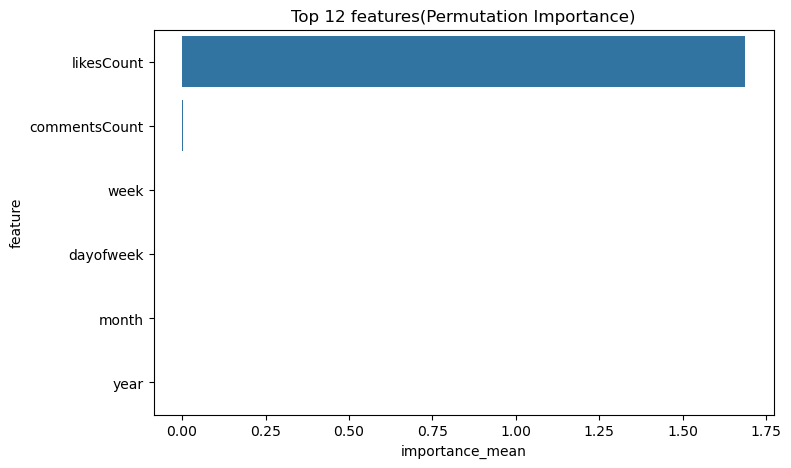

In [220]:
feat_names=candidate_features
perm_imp=permutation_importance(best_rf,X_test_num,y_test,n_repeats=20,
random_state=SEED,n_jobs=-1)
imp_df=pd.DataFrame({"feature":feat_names,"importance_mean":
perm_imp.importances_mean,"importance_sts":perm_imp.importances_std})
imp_df=imp_df.sort_values("importance_mean",ascending=False).reset_index(drop=True)
print("\nTop features by permutation importance:")
display(imp_df.head(15))
plt.figure(figsize=(8,5))
sns.barplot(x="importance_mean",y="feature",data=imp_df.head(12))
plt.title("Top 12 features(Permutation Importance)")
plt.show()

In [221]:
# 16. Time-series visualization & short LSTM demo (optional)

if 'Date_parsed' in model_df.columns and 'latlon_grid' in model_df.columns:
    # plot mean target over time across dataset
    ts = model_df.set_index('Date_parsed').resample('M')[TARGET].mean().dropna()
    plt.figure(figsize=(10,4))
    ts.plot(marker='o')
    plt.title(f"Monthly mean {TARGET}")
    plt.ylabel(TARGET)
    plt.show()

# Minimal LSTM demo for the most frequent grid with >= 40 points
    top_grid = model_df['latlon_grid'].value_counts().idxmax()
    sub = model_df[model_df['latlon_grid'] == top_grid].sort_values('Date_parsed')
    if len(sub) >= 40:
        try:
            from tensorflow.keras.models import Sequential
            from tensorflow.keras.layers import LSTM, Dense
            series = sub.set_index('Date_parsed')[TARGET].resample('W').mean().ffill()
            window = 6
            seq = series.values
            Xs, Ys = [], []
            for i in range(len(seq) - window):
                Xs.append(seq[i:i+window])
                Ys.append(seq[i+window])
            Xs = np.array(Xs).reshape(-1, window, 1)
            Ys = np.array(Ys)
            split = int(0.8*len(Xs))
            model = Sequential([LSTM(32, input_shape=(window,1)), Dense(1)])
            model.compile(optimizer='adam', loss='mse')
            model.fit(Xs[:split], Ys[:split], validation_data=(Xs[split:], Ys[split:]), epochs=20, batch_size=8, verbose=0)
            pred_lstm = model.predict(Xs[split:])
            print("LSTM demo trained; sample predictions:", pred_lstm[:3].flatten())
        except Exception as e:
            print("Skipping LSTM demo (tensorflow not available or error):", e)
    else:
        print("Not enough data for LSTM demo on a single location.")
else:
    print("Skipping time-series / LSTM demo (Date_parsed or latlon_grid missing).")



Skipping time-series / LSTM demo (Date_parsed or latlon_grid missing).


In [222]:
# 17. Topic modeling (LDA) on comments (simple)

In [223]:
# Imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set seed for reproducibility
SEED = 42

# Sample data (replace with your own data if available)
data = {
    'text_clean': [
        "This is the first example text.",
        "Here is another piece of text to test LDA.",
        "Topic modeling with LDA is interesting and useful.",
        "Natural language processing can extract topics from documents.",
        "We are testing topic modeling on small sample data.",
        "LDA helps discover hidden topics in a set of documents."
    ]
}

# Create DataFrame
model_df = pd.DataFrame(data)

# Prepare stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Tokenization, stopword removal, and lemmatization
processed = []
for doc in model_df['text_clean'].dropna().astype(str).values:
    toks = word_tokenize(doc.lower())
    toks = [lemmatizer.lemmatize(t) for t in toks if t.isalpha() and t not in stop_words and len(t) > 2]
    processed.append(toks)

if processed:
# Create dictionary and corpus for LDA
    dictionary = corpora.Dictionary(processed)
    dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=2000)
    corpus = [dictionary.doc2bow(text) for text in processed]

# Train LDA model
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10, random_state=SEED)

# Print topics in readable form
    print("\nLDA Topics:")
    for i, topic in lda.show_topics(formatted=False, num_words=6):
        print(f"Topic {i}: {[word for word, _ in topic]}")

# Assign main topic to each document
    doc_topics = [max(lda[corpus[i]], key=lambda x: x[1])[0] for i in range(len(corpus))]
    model_df['main_topic'] = doc_topics

    print("\nDocuments with assigned topics:")
    print(model_df[['text_clean', 'main_topic']])
else:
    print("No processed tokens for topic modeling.")



LDA Topics:
Topic 0: ['text', 'lda', 'piece', 'another', 'test', 'natural']
Topic 1: ['document', 'set', 'discover', 'hidden', 'help', 'first']
Topic 2: ['modeling', 'useful', 'interesting', 'sample', 'data', 'small']

Documents with assigned topics:
                                          text_clean  main_topic
0                    This is the first example text.           1
1         Here is another piece of text to test LDA.           0
2  Topic modeling with LDA is interesting and use...           2
3  Natural language processing can extract topics...           1
4  We are testing topic modeling on small sample ...           2
5  LDA helps discover hidden topics in a set of d...           1


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\romar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [224]:
!pip install folium

In [225]:
# 18. Geo visualization (Folium) of sample points (optional)
# Imports
import pandas as pd
import folium

# Sample data (replace with your own data)
data = {
    'latitude': [37.7749, 34.0522, 40.7128, 51.5074, 48.8566],
    'longitude': [-122.4194, -118.2437, -74.0060, -0.1278, 2.3522],
    'value_column': [10, 20, 15, 5, 25]  # This is the target column for coloring
}

# Create DataFrame
model_df = pd.DataFrame(data)

# Set seed
SEED = 42
TARGET = 'value_column'

# Check if Folium is available and lat/lon exist
if folium is not None and {'latitude','longitude'}.issubset(model_df.columns):
    # Drop missing coordinates and duplicates
    sample_geo = model_df.dropna(subset=['latitude', 'longitude']).drop_duplicates(subset=['latitude','longitude'])
    
    # Sample points
    sample_size = min(500, sample_geo.shape[0])
    sample_geo = sample_geo.sample(n=sample_size, random_state=SEED)
    
    # Create map centered at mean location
    m = folium.Map(
        location=[sample_geo['latitude'].mean(), sample_geo['longitude'].mean()],
        zoom_start=2,
        tiles='CartoDB positron'
    )
    
    # Add points with color based on TARGET
    for _, r in sample_geo.iterrows():
        folium.CircleMarker(
            [r['latitude'], r['longitude']],
            radius=5,
            color='red' if r.get(TARGET, 0) > model_df[TARGET].median() else 'blue',
            fill=True
        ).add_to(m)
    
    # Display map in Jupyter or save as HTML
    try:
        from IPython.display import display
        display(m)
    except ImportError:
        m.save("map.html")
        print("Map saved as map.html")
    
    print("Generated Folium map for a sample of points.")
else:
    print("Skipping folium map (folium not installed or lat/lon missing).")


Generated Folium map for a sample of points.


In [226]:
# 19.Scenario analysis / future projection

In [227]:
#We'll take a few representative rows from
#test set and simulate scenarios

In [228]:
# 1. Sample rows
sample_rows = X_test.sample(n=min(5, len(X_test)), random_state=SEED).copy()
print("\nBase sample rows for scenario simulation (first row):")
display(sample_rows.head(1))


# 2. Fit transformer (if not already fitted)
num_transformer.fit(X_train_num)  # fit on training data


# 3. Function to simulate changes
def simulate_change(df_rows, change_spec, model, scaler, feature_list):
    """
    change_spec: dict of feature -> {"type": "mul"/"add", "value": v}
    """
    dfc = df_rows.copy()
    for f, spec in change_spec.items():
        if f in dfc.columns:
            if spec.get("type") == "add":
                dfc[f] = dfc[f] + spec.get("value", 0)
            else:  # default multiply
                dfc[f] = dfc[f] * spec.get("value", 1.0)
    # Apply scaling after all changes
    Xc = scaler.transform(dfc[feature_list])
    preds = model.predict(Xc)
    return preds


# 4. Define scenarios
scenarios = [
    {"sentiment": {"type": "mul", "value": 1.5}},
    {"CommentsCount": {"type": "mul", "value": 1.5}},
    {"LikesCount": {"type": "mul", "value": 1.2}}
]


# 5. Run scenarios
for sc in scenarios:
    preds = simulate_change(sample_rows, sc, best_rf, num_transformer, candidate_features)
    print("Scenario", sc, "-> sample preds:", np.round(preds[:3], 3))



Base sample rows for scenario simulation (first row):


,likesCount,commentsCount,year,month,week,dayofweek
210,0,NaN,2021,9,38,2


Scenario {'sentiment': {'type': 'mul', 'value': 1.5}} -> sample preds: [3. 3. 3.]
Scenario {'CommentsCount': {'type': 'mul', 'value': 1.5}} -> sample preds: [3. 3. 3.]
Scenario {'LikesCount': {'type': 'mul', 'value': 1.2}} -> sample preds: [3. 3. 3.]


In [229]:
# 20. Save best model & report
import joblib
import json
from datetime import datetime, timezone

best_model = best_rf  # selected from grid search or training

artifact = {
    'model': best_model,
    'pipeline': num_transformer,
    'features': candidate_features
}

# Save the artifact (model, pipeline, features)
joblib.dump(artifact, 'intermediate_climate_model.joblib')
print("Saved model artifact to intermediate_climate_model.joblib")

# Create a report dictionary
report = {
    'timestamp': datetime.now(timezone.utc).isoformat(),
    'data_shape': df.shape,                # your dataset DataFrame
    'feature_count': len(candidate_features),
    'target': TARGET                      # target column name
    
}

# Write report to JSON file
with open('model_report_intermediate.json', 'w') as f:
    json.dump(report, f, indent=2)

print("Wrote model_report_intermediate.json")


Saved model artifact to intermediate_climate_model.joblib
Wrote model_report_intermediate.json


In [230]:
# 21. Flask deployment snippet 
flask_snippet = """
# Flask deployment snippet (save as app.py)
from flask import Flask, request, jsonify
import joblib, pandas as pd
app = Flask(__name__)
pack = joblib.load('intermediate_climate_model.joblib')
model = pack['model']
pipeline = pack['pipeline']
features = pack['features']

@app.route('/predict', methods=['POST'])
def predict():
    payload = request.json
    df = pd.DataFrame(payload)
    Xp = pipeline.transform(df[features])
    preds = model.predict(Xp)
    return jsonify({'predictions': preds.tolist()})

if __name__ == '__main__':
    app.run(port=5000, debug=True)
"""
print("\nFlask snippet (first 400 chars):\n", flask_snippet[:400], "...")




Flask snippet (first 400 chars):
 
# Flask deployment snippet (save as app.py)
from flask import Flask, request, jsonify
import joblib, pandas as pd
app = Flask(__name__)
pack = joblib.load('intermediate_climate_model.joblib')
model = pack['model']
pipeline = pack['pipeline']
features = pack['features']

@app.route('/predict', methods=['POST'])
def predict():
    payload = request.json
    df = pd.DataFrame(payload)
    Xp = pipel ...
